## VARMA example

In [48]:
# VARMA example
from statsmodels.tsa.statespace.varmax import VARMAX
from random import random
from pandas.core import datetools
import numpy as np

In [66]:
data = list()

In [52]:
np.random.normal(0,0.1)

-0.011660509020867548

In [67]:
for i in range(1000):
    v1 = np.random.normal(0,0.01)
    v2 = v1 + np.random.normal(0,0.01)
    row = [v1, v2]
    data.append(row)

In [5]:
import matplotlib.pyplot as plt

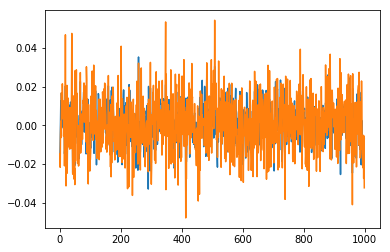

In [68]:
plt.plot(data)
plt.show()

In [7]:
import numpy as np

In [69]:
data=np.array(data)
data.shape

(1000, 2)

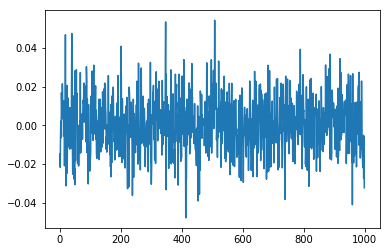

In [70]:
plt.plot(data[:,1])

In [71]:
# fit model
model = VARMAX(data, order=(1, 1))

/Users/JoaoGomes/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/statespace/varmax.py:153: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)


In [72]:
model_fit = model.fit(disp=False)

/Users/JoaoGomes/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/vector_ar/var_model.py:461: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  params = np.linalg.lstsq(z, y_sample)[0]
/Users/JoaoGomes/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/statespace/representation.py:363: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]


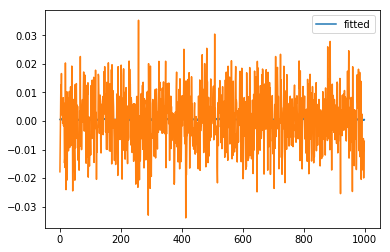

In [73]:
plt.plot(model_fit.fittedvalues[:,0],label='fitted')
plt.legend(loc='best')
plt.plot(data[:,0])

In [74]:
dif=data[:,0]-model_fit.fittedvalues[:,0]

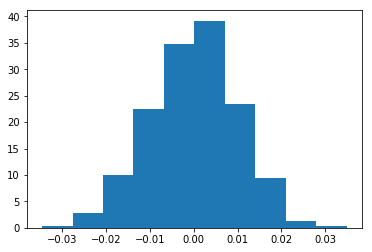

In [75]:
plt.hist(dif,10,normed=True)
plt.show()

In [76]:
np.sqrt(dif.var())

0.009981786470097457

In [77]:
dif2=data[:,1]-model_fit.fittedvalues[:,1]

(array([ 0.39390304,  1.67408792,  8.37043958, 17.72563676, 26.58845515,
        25.40674603, 12.90032453,  4.43140919,  0.59085456,  0.39390304]),
 array([-0.04864686, -0.03849207, -0.02833729, -0.01818251, -0.00802772,
         0.00212706,  0.01228184,  0.02243663,  0.03259141,  0.04274619,
         0.05290098]),
 <a list of 10 Patch objects>)

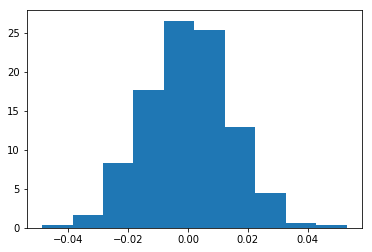

In [78]:
plt.hist(dif2,10,normed=True)

In [79]:
np.sqrt(dif2.var())

0.014277094827769572

## VAR model

In [80]:
from statsmodels.tsa.vector_ar.var_model import VAR

In [237]:
data2 = list()

In [238]:
data2.append([0,0])
for i in range(1,1000):
    v1 = 0.6*data2[i-1][0]+np.random.normal(0,1)
    v2 = 0.4*data2[i-1][0] + np.random.normal(0,0.2)
    row = [v1, v2]
    data2.append(row)

In [239]:
model = VAR(data2)
model_fit = model.fit()

/Users/JoaoGomes/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/vector_ar/var_model.py:461: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  params = np.linalg.lstsq(z, y_sample)[0]


In [240]:
data2=np.array(data2)
data2.shape

(1000, 2)

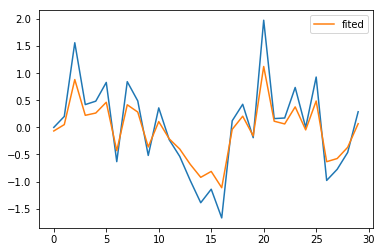

In [241]:
plt.plot(data2[:30,0])
plt.plot(model_fit.fittedvalues[:30,0],label='fited')
plt.legend(loc='best')

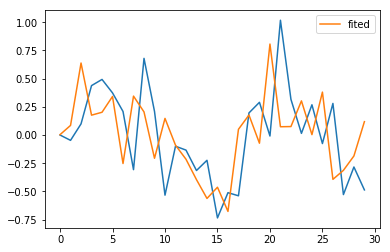

In [242]:
plt.plot(data2[:30,1])
plt.plot(model_fit.fittedvalues[:30,1],label='fited')
plt.legend(loc='best')

In [243]:
dif_var2=data2[:999,0]-model_fit.fittedvalues[:,0]

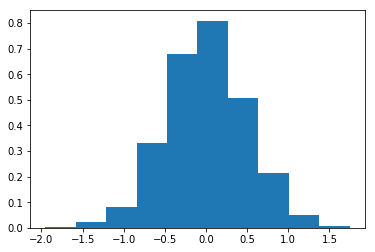

In [244]:
plt.hist(dif_var2,normed=True)
plt.show()

In [245]:
np.sqrt(dif_var2.var())

0.4849867152914496

In [246]:
dif2_var2=data2[:999,1]-model_fit.fittedvalues[:,1]

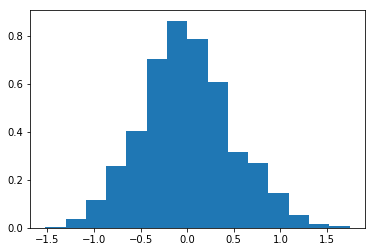

In [247]:
plt.hist(dif2_var2,15,normed=True)
plt.show()

In [248]:
np.sqrt(dif2_var2.var())

0.48863523534702624

In [254]:
ypred0=model_fit.fittedvalues[:,0]

In [250]:
y0=data2[:999,0]

In [251]:
np.sqrt(y0.var())

1.2822337106464674

In [252]:
np.sqrt(1/(1-0.6**2))

1.25

In [255]:
np.sqrt(ypred0.var())

0.799447496417538

In [257]:
0.6*1.28

0.768

In [258]:
ypred1=model_fit.fittedvalues[:,1]

In [259]:
np.sqrt(ypred1.var())

0.5222458646971265

In [276]:
np.sqrt(0.4**2*ypred0.var()/(0.6**2)+0.2**2)

0.5692553808961589

In [260]:
y1=data2[:999,1]

In [261]:
np.sqrt(y1.var())

0.5571762859635513

In [263]:
np.sqrt(0.4**2*y0.var()+0.2**2)

0.5505086068309137

In [213]:
model_fit.k_ar

1

In [270]:
model_fit.params

array([[-0.06627894,  0.00343413],
       [ 0.60212417,  0.40626476],
       [ 0.08090656,  0.00401093]])

Test the linearity of the model

In [267]:
x=[]
y=[]
for i in range(1,len(ypred0)):
    x.append(ypred0[i])
    y.append(ypred0[i-1])


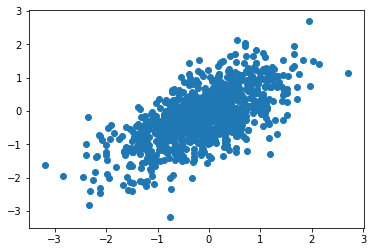

In [269]:
plt.scatter(y,x)

### ARIMA

In [277]:
from statsmodels.tsa.arima_model import ARIMA
from random import random

A simple model for a time series with a linear trend and white noise

In [290]:
# contrived dataset
data = [x + np.random.normal(0,20) for x in range(1, 1000)]

In [291]:
# fit model
model = ARIMA(data, order=(1, 1, 1))
model_fit = model.fit(disp=False)

/Users/JoaoGomes/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/Users/JoaoGomes/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


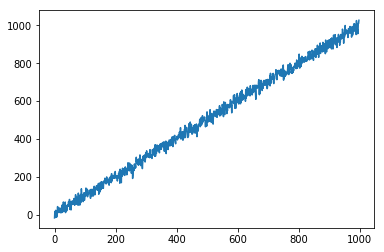

In [330]:
plt.plot(data)
plt.show()

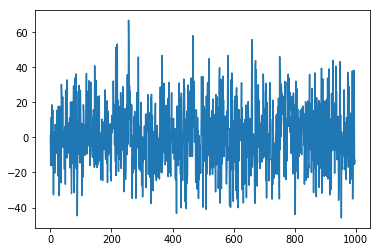

In [295]:
plt.plot(model_fit.fittedvalues)

In [296]:
len(model_fit.fittedvalues)


998

In [313]:
fit=[0]*998
for i in range(1,998):
    fit[i]=i-model_fit.fittedvalues[i]


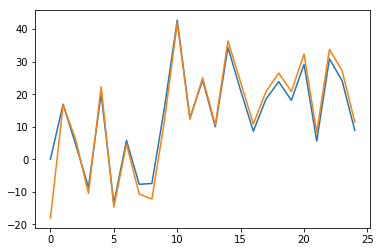

In [315]:
plt.plot(fit[:25])
plt.plot(data[:25])

Calculate difference series $$\text{dif}_i=x_{i+1}-x_i$$

In [317]:
dif=[]
for i in range(len(data)-1):
    dif.append(data[i+1]-data[i])
    

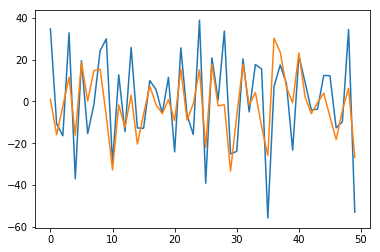

In [324]:
plt.plot(dif[:50])
plt.plot(model_fit.fittedvalues[:50])

We can check that model_fit.fittedvalues correspond indeed to the difference series

Residuals have normal distribution

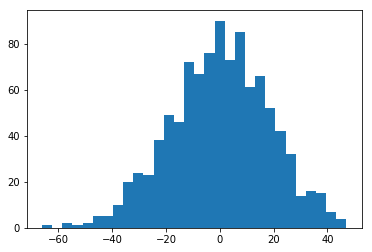

In [332]:
plt.hist(model_fit.resid,30)
plt.show()

In [333]:
np.sqrt(model_fit.resid.var())

18.33224391647173

#### Another example with quadratic trend

In [335]:
import warnings
warnings.filterwarnings("ignore")

In [334]:
data3=[x**2 + np.random.normal(0,20) for x in range(1, 1000)]

In [343]:
model = ARIMA(data3, order=(1, 2, 0))
model_fit = model.fit(disp=False)

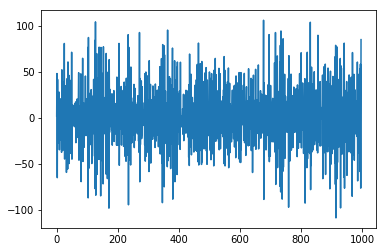

In [344]:
plt.plot(model_fit.fittedvalues)

In [358]:
prediction=model_fit.predict(start=2,end=100,typ='levels')

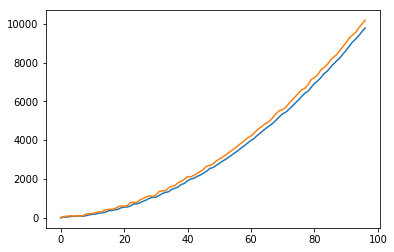

In [360]:
plt.plot(data3[2:99])
plt.plot(prediction[2:99])

#### Check for stationarity

In [361]:
from statsmodels.tsa.stattools import adfuller

In [363]:
# adfuller test
X = model_fit.fittedvalues
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -14.413422
p-value: 0.000000
Critical Values:
	1%: -3.437
	5%: -2.865
	10%: -2.568


It is stationary! p-value is too small (zero in this case) which means that we should reject the Null Hypothesis, that is, that is it is non-stationary